# 1. 主成分分析法

1. 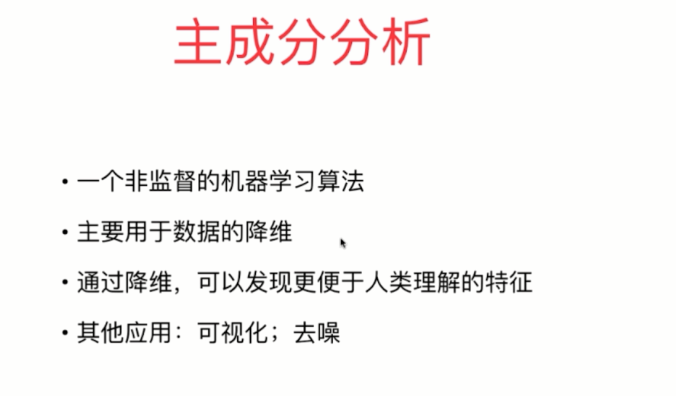

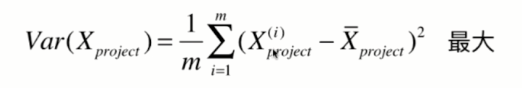

2. 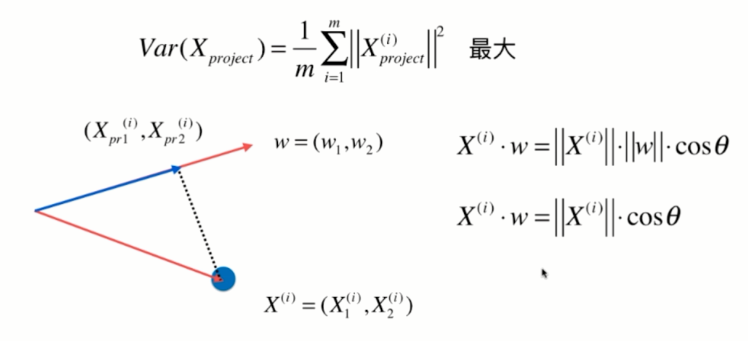

3 .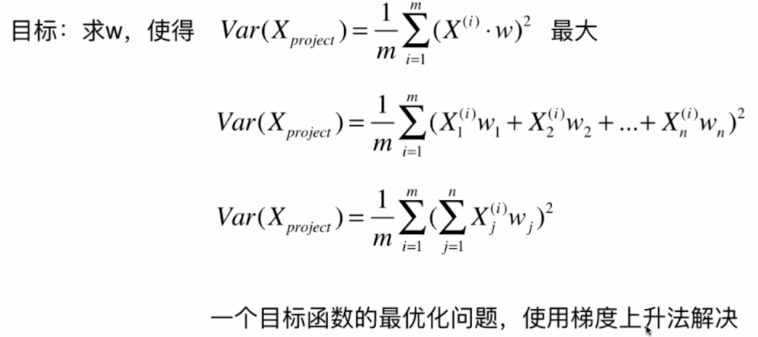

# 2. 使用梯度上升法求解主成分分析

### 对上面的函数进行求导进行计算（每一个 w 进行偏导）
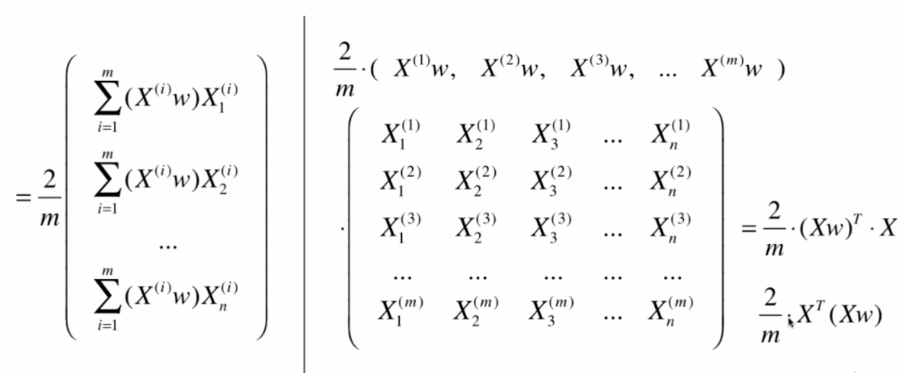

In [44]:
import numpy as np
import matplotlib.pylab as plt

In [45]:
np.random.seed(666)
X = np.empty((100,2))
X[:,0] = np.random.uniform(0,100,size =100)
X[:,1] = X[:,0]*0.75+4+np.random.normal(0,10,size=100)

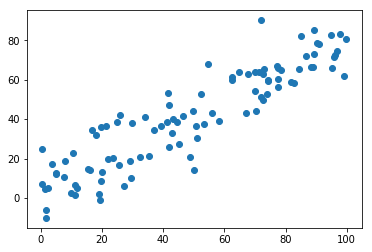

In [46]:
plt.scatter(X[:,0],X[:,1])

In [47]:
def demean(X): ## 归一均值归零花
    return X - np.mean(X,axis = 0)

In [48]:
X_demean = demean(X)  

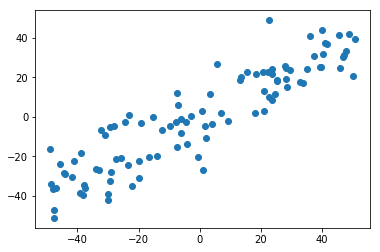

In [49]:
plt.scatter(X_demean[:,0],X_demean[:,1])

## 3.梯度上升法求最大值

In [50]:
def f(w,X): ## 目标函数
    return np.sum((X.dot(w)**2.0))/len(X)

In [51]:
def df_math(w,X): ## 目标函数的梯度（（数学计算的倒数）
    return X.T.dot(X.dot(w))*2.0/len(X)

In [52]:
def dJ_debug(w,X,epslion = 0.0001):  ##对每一个w ,对应加减很小的值，得到梯度（导数的定义）
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epslion
        w_2 = w.copy()
        w_2[i] -= epslion   
        res[i] = (f(w_1,X) - f(w_2,X))/(2*epslion) # 偏导求每个w的值
    return res

In [53]:
def dirction(x):
    return x / np.linalg.norm(x)
def gradient_ascent(df,X,initial_w,eta, n_iters =1e4,epsilon = 1e-8):
    w = dirction(initial_w)
    i_iters =0
    while i_iters < n_iters:
        gradient = df(w,X)
        last_w = w
        w = w + eta*gradient
        w = dirction(w) # 归一成单位的向量
        if abs(f(w,X) - f(last_w,X)) < epsilon:
            break
        i_iters +=1
    return w

In [54]:
X = np.empty((100,2))
X[:,0] = np.random.uniform(0,100,size =100)
X[:,1] = X[:,0]*0.75+np.random.normal(0,10,100)
X_demean = demean(X) 
initial_w = np.random.random(X.shape[1]) ## 初始化不能为 0 向量
eta = 0.001

In [55]:
w= gradient_ascent(dJ_debug,X_demean,initial_w,eta)

array([0.78961368, 0.6136043 ])

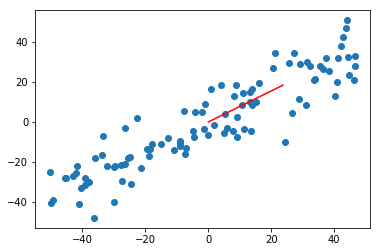

In [56]:
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.plot([0,w[0]*30],[0,w[1]*30],'r-')
w

array([0.79999972, 0.60000038])

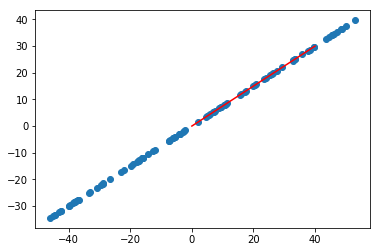

In [57]:
X = np.empty((100,2))
X[:,0] = np.random.uniform(0,100,size =100)
X[:,1] = X[:,0]*0.75
XX_demean = demean(X) 
initial_w = np.random.random(X.shape[1])
eta = 0.001
ww = gradient_ascent(df_math,XX_demean,initial_w,eta)
plt.scatter(XX_demean[:,0],XX_demean[:,1])
plt.plot([0,ww[0]*50],[0,ww[1]*50],'r-')
ww

# 4 .获取前 n 个主成分

In [58]:
import numpy as np
import matplotlib.pylab as plt


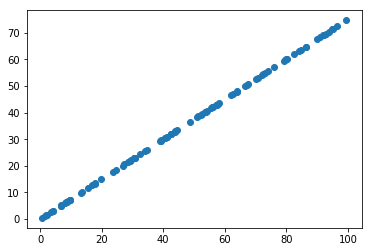

In [59]:
plt.scatter(X[:,0],X[:,1])

In [60]:
def f(w,X): ## 目标函数
    return np.sum((X.dot(w)**2.0))/len(X)
def df(w,X): ## 目标函数的梯度（（数学计算的倒数）
    return X.T.dot(X.dot(w))*2.0/len(X)

def dirction(x):
    return x / np.linalg.norm(x)

def fisrt_compent(X,initial_w,eta, n_iters =1e4,epsilon = 1e-8):
    w = dirction(initial_w)
    i_iters =0
    while i_iters < n_iters:
        gradient = df(w,X)
        last_w = w
        w = w + eta*gradient
        w = dirction(w) # 归一成单位的向量
        if abs(f(w,X) - f(last_w,X)) < epsilon:
            break
        i_iters +=1
    return w

array([0.78961367, 0.61360431])

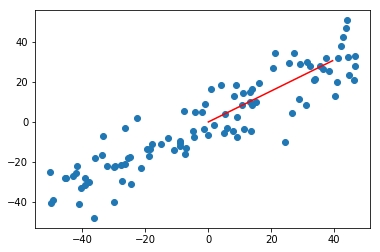

In [61]:
def demean(X): ## 归一均值归零花
    return X - np.mean(X,axis = 0)

np.random.seed(666)
X = np.empty((100,2))
X[:,0] = np.random.uniform(0,100,size =100)
X[:,1] = X[:,0]*0.75+4+np.random.normal(0,10,size=100)
X = demean(X)

initial_w = np.random.random(X.shape[1])
eta = 0.001
w = fisrt_compent(X_demean,initial_w,eta)
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.plot([0,w[0]*50],[0,w[1]*50],'r-')
w

In [62]:
x2 = np.empty(X.shape) # 空向量

In [63]:
x2 = X - X.dot(w).reshape(-1,1)*w  #w就是单位向量 

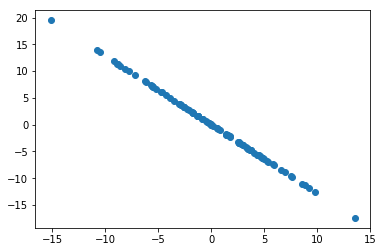

In [64]:
plt.scatter(x2[:,0],x2[:,1])

In [65]:
def first_n_compnents(n,X,eta = 0.001, n_iters =1e4,epsilon = 1e-8):
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res =[]
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = fisrt_compent(X_pca,initial_w,eta)
        res.append(w)
        X_pca = X_pca - X_pca.dot(w).reshape(-1,1)*w 
    return res 

In [66]:
first_n_compnents(2,X)

[array([0.77660967, 0.62998208]), array([-0.62996613,  0.77662261])]

# 5. 高维数据到低维数据的映射

### 高维到低维 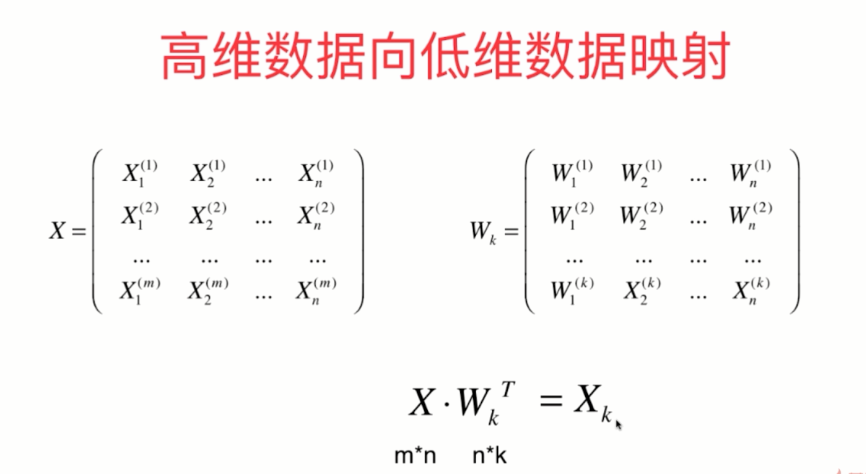

### 低维到高维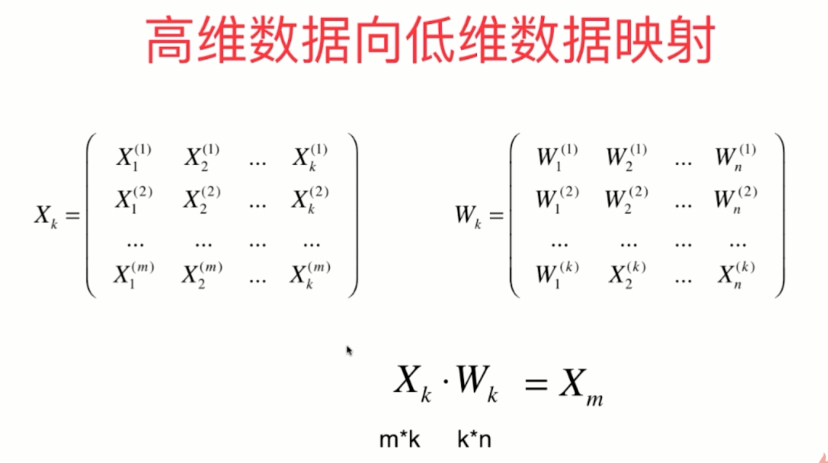

### 用自己封装好的PCA

In [67]:
import numpy as np
import matplotlib.pylab as plt
np.random.seed(666)
X = np.empty((100,2))
X[:,0] = np.random.uniform(0,100,size =100)
X[:,1] = X[:,0]*0.75+4+np.random.normal(0,10,size=100)


In [68]:
from playML.PCA import PCA

In [69]:
pca = PCA(n_components= 2)

In [70]:
pca.fit(X)

PCA(n_components=2)

In [71]:
pca.components_

array([[ 0.77660882,  0.62998313],
       [ 0.63000024, -0.77659494]])

In [72]:
pca=PCA(n_components= 1)
pca.fit(X)

PCA(n_components=1)

In [73]:
X_reduction = pca.transform(X)

In [74]:
X_restore = pca.inverse_transform(X_reduction)

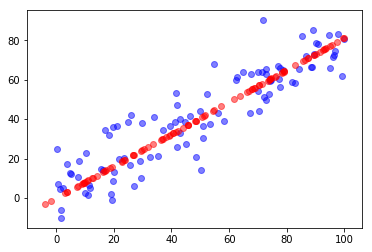

In [75]:
plt.scatter(X[:,0],X[:,1],color ='b',alpha= 0.5)
plt.scatter(X_restore[:,0],X_restore[:,1],color ='r',alpha= 0.5)

### scikit sklearn封装好的PCA

In [76]:
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
from sklearn import datasets
from playML.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [77]:
digits = datasets.load_digits() ## 手写是写

In [80]:
X = digits.data
y = digits.target

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_ratio=0.2,seed= 666)

In [82]:
%%time
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
knn_clf.score(X_test,y_test)

Wall time: 75.2 ms


In [83]:
pca = PCA(n_components=2)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [84]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [85]:
%%time
knn = KNeighborsClassifier()
knn.fit(X_train_pca,y_train)

Wall time: 2.01 ms


In [86]:
knn.score(X_test_pca,y_test)

0.6100278551532033

In [87]:
pca.explained_variance_ratio_ ## 方差涵盖了了总体的多少

array([0.14508041, 0.13711103])

In [88]:
pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=64, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

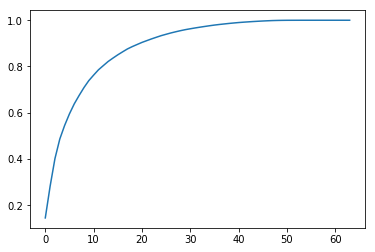

In [89]:
plt.plot([i for i in range(X_train.shape[1])],np.cumsum(pca.explained_variance_ratio_ ))

In [90]:
pca = PCA(0.95)

In [91]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [92]:
pca.n_components_

28

In [93]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [94]:
%%time
knn = KNeighborsClassifier()
knn.fit(X_train_pca,y_train)

Wall time: 3.01 ms


In [95]:
knn.score(X_test_pca,y_test)

0.9832869080779945

In [96]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

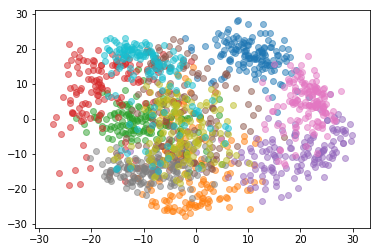

In [97]:
for i in range(10):
    plt.scatter(X_train_pca[y_train==i,0],X_train_pca[y_train==i,1],alpha= 0.5)

# 6.MNIST 手写数据集的应用

In [98]:
import numpy as np
from sklearn.datasets import fetch_mldata

In [99]:
mnist = fetch_mldata('MNIST original',data_home= r'D:\software\python36\Lib\site-packages\sklearn\datasets')

d:\software\python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
d:\software\python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [100]:
X,y = mnist['data'],mnist['target']

In [101]:
X.shape

(70000, 784)